In [1]:
1

0.16666666666666666


In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt


c:\Users\1163080609\anaconda3\Lib\site-packages\qutip\__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


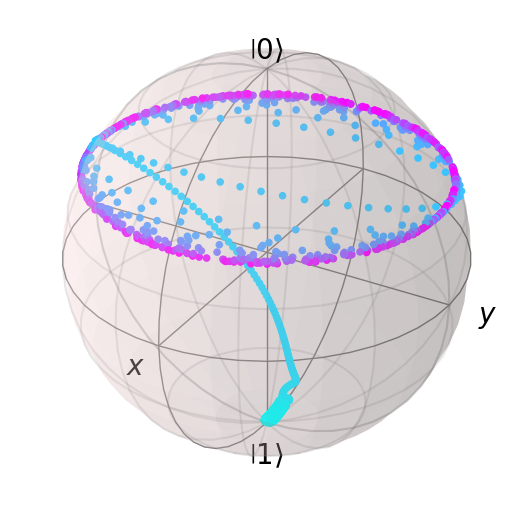

In [1]:
import matplotlib as mpl
import numpy as np
from matplotlib import cm
from qutip import Bloch, about, basis, destroy, sesolve, sigmax, sigmay, sigmaz

#matplotlib inline

delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi  # sweep rate

H0 = delta / 2.0 * sigmax()
H1 = v / 2.0 * sigmaz()
H = [H0, [H1, "t"]]
psi0 = basis(2, 0)

sm = destroy(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
expt_ops = [sm.dag() * sm, sx, sy, sz]


tlist = np.linspace(-10.0, 10.0, 1500)
expt_list = sesolve(H, psi0, tlist, expt_ops).expect



b = Bloch()
# normalize colors to times in tlist ##
nrm = mpl.colors.Normalize(-2, 10)
colors = cm.cool(nrm(tlist))

# add data points from expectation values ##
b.add_points([expt_list[1], expt_list[2], -expt_list[3]], "m")

# customize sphere properties ##
b.point_color = list(colors)
b.point_marker = ["o"]
b.point_size = [20]

b.zlpos = [1.1, -1.2]

b.show()

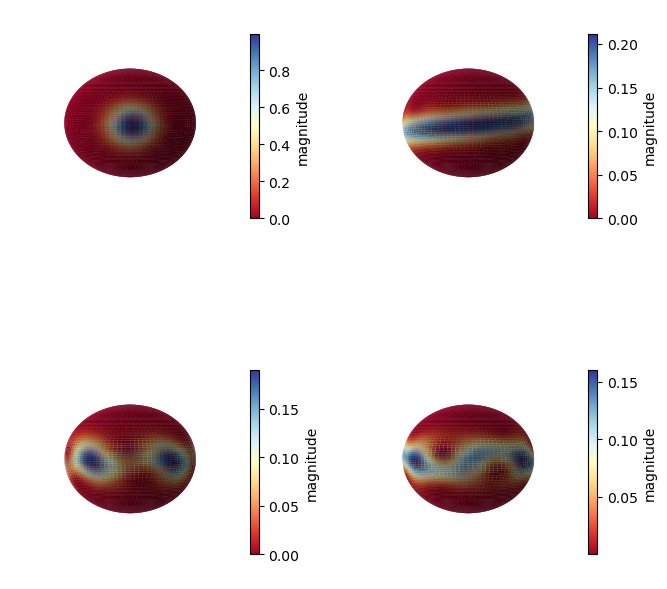

In [3]:
from qutip import spin_coherent,jmat,spin_q_function,plot_spin_distribution_3d,mesolve
import numpy as np
import matplotlib.pyplot as plt

n=30#原子数
j = n//2
psi0 = spin_coherent(j, np.pi/2, 0)#设置初态,自旋相干态
Jz=jmat(j,"z")
H=Jz**2#系统的哈密顿量

tlist=np.linspace(0,1,100)#时间列表
result=mesolve(H,psi0,tlist)#态随时间的演化

theta=np.linspace(0, np.pi, 100)
phi=np.linspace(0, 2*np.pi, 100)
Q1, THETA1, PHI1 = spin_q_function(result.states[0], theta, phi)
Q2, THETA2, PHI2 = spin_q_function(result.states[30], theta, phi)
Q3, THETA3, PHI3 = spin_q_function(result.states[60], theta, phi)
Q4, THETA4, PHI4 = spin_q_function(result.states[90], theta, phi)

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221,projection='3d')
ax2 = fig.add_subplot(222,projection='3d')
ax3 = fig.add_subplot(223,projection='3d')
ax4 = fig.add_subplot(224,projection='3d')

plot_spin_distribution_3d(Q1, THETA1, PHI1,fig=fig,ax=ax1)
plot_spin_distribution_3d(Q2, THETA2, PHI2,fig=fig,ax=ax2)
plot_spin_distribution_3d(Q3, THETA3, PHI3,fig=fig,ax=ax3)
plot_spin_distribution_3d(Q4, THETA4, PHI4,fig=fig,ax=ax4)

for ax in [ax1,ax2,ax3,ax4]:
    ax.view_init(0.5*np.pi, 0)
    ax.axis('off')#不显示坐标轴
#fig.savefig("1.png",dpi=400)
plt.show()